In [99]:
import pandas as pd
import geopandas
import folium
from folium.plugins import TimeSliderChoropleth

### Load districts from excel (gps coordinations)

In [9]:
# ?pd.read_excel
districts = pd.read_excel('data/districts.xlsx')
districts.head()

obec       lat       lon  okres     ref                  kraj
0      ABELOVA  48.41179  19.43460  606.0  SK0326  Banskobystrický kraj
1       ABOVCE  48.32291  20.34604  609.0  SK0329  Banskobystrický kraj
2      ABRAHAM  48.24642  17.61967  202.0  SK0212         Trnavský kraj
3  ABRAHAMOVCE  49.16146  21.34378  701.0  SK0411        Prešovský kraj
4     ABRAMOVA  48.93542  18.79531  509.0  SK0319         Žilinský kraj

### Load geofiles

In [4]:
# ?geopandas.read_file
districts_shp = geopandas.read_file('data/districts.shp', encoding = 'utf8')
districts_shp.head()

Okres     REF                                           geometry
0   Banská Bystrica  SK0321  POLYGON ((18.99112 48.80609, 18.99494 48.81556...
1  Banská Štiavnica  SK0322  POLYGON ((18.75064 48.41116, 18.75472 48.41284...
2          Bardejov  SK0411  POLYGON ((20.98654 49.30662, 20.99414 49.31268...
3        Bratislava  SK0101  POLYGON ((17.22444 48.19175, 17.22513 48.18639...
4            Brezno  SK0323  POLYGON ((19.35043 48.89758, 19.35652 48.90367...

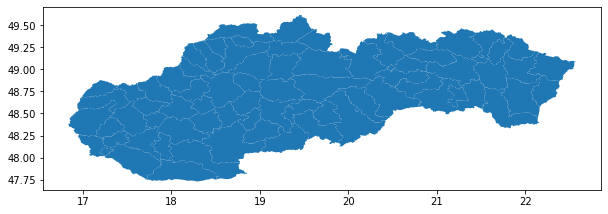

In [132]:
# ?geopandas.GeoDataFrame
districts_shp = geopandas.GeoDataFrame(districts_shp, geometry='geometry')
districts_shp['geometry'] = districts_shp['geometry'].simplify(tolerance=0.001, preserve_topology=True)
districts_shp.crs = 'epsg:4326'
districts_shp.plot(figsize=(10,10))

### Load average wages in Slovakia (statdata.sk Mzdy zamestnancov podľa SK NACE Rev. 2 - Priemerná nominálna mesačná mzda zamestnanca (Eur))

In [47]:
wages = pd.read_excel('data/averages-wages.xlsx', sheet_name=1, header=0)
wages.head()

district  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
0   Slovenská republika   803   828   853   881   891   957   993  1034  1095   
1    Okres Bratislava I  1293  1275  1211  1247  1237  1334  1375  1486  1495   
2   Okres Bratislava II  1356  1327  1224  1260  1316  1422  1446  1392  1499   
3  Okres Bratislava III  1200  1173  1157  1194  1130  1252  1314  1337  1466   
4   Okres Bratislava IV  1098  1061  1074  1096  1212  1320  1359  1450  1517   

   2018  
0  1171  
1  1553  
2  1696  
3  1508  
4  1637

### Cleaning data

In [69]:
wages['district'] = wages['district'].str.replace('Okres ','')
wages.loc[wages['district'].str.contains('Bratislava'), 'district'] = 'Bratislava'
wages.loc[wages['district'].str.contains('Košice I'), 'district'] = 'Košice'
wages.head(100)

district  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
0   Slovenská republika   803   828   853   881   891   957   993  1034  1095   
1            Bratislava  1293  1275  1211  1247  1237  1334  1375  1486  1495   
2            Bratislava  1356  1327  1224  1260  1316  1422  1446  1392  1499   
3            Bratislava  1200  1173  1157  1194  1130  1252  1314  1337  1466   
4            Bratislava  1098  1061  1074  1096  1212  1320  1359  1450  1517   
..                  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
75           Michalovce   669   681   726   742   784   824   844   868   919   
76              Rožňava   667   687   802   818   796   847   867   886   919   
77             Sobrance   684   703   747   779   749   792   819   831   951   
78     Spišská Nová Ves   638   652   726   752   746   799   812   854   900   
79             Trebišov   614   616   919   754   700   737   760   801   837   

    2018  
0   1171  
1   1553  
2   1696  
3   1508  
4   1637  
..   ...  
75  1000  
76   986  
77   886  
78   961  
79   886  

[80 rows x 11 columns]

### Aggregate

In [53]:
avg_wages = wages.groupby(['district']).agg('mean')
avg_wages.reset_index(inplace=True)
avg_wages.head()

district    2009    2010    2011    2012    2013    2014    2015  \
0   Banská Bystrica   756.0   781.0   831.0   868.0   867.0   941.0   957.0   
1  Banská Štiavnica   621.0   621.0   792.0   790.0   678.0   714.0   732.0   
2          Bardejov   466.0   492.0   580.0   604.0   597.0   614.0   636.0   
3        Bratislava  1206.2  1181.8  1141.4  1173.4  1200.0  1310.0  1348.4   
4            Brezno   599.0   652.0   718.0   729.0   746.0   800.0   820.0   

     2016    2017    2018  
0   999.0  1075.0  1126.0  
1   725.0   690.0   878.0  
2   658.0   716.0   726.0  
3  1400.6  1474.0  1562.2  
4   865.0   927.0   990.0

In [36]:
avg_wages.describe()

2009         2010         2011         2012         2013  \
count    72.000000    72.000000    72.000000    72.000000    72.000000   
mean    660.950000   696.691667   745.055556   764.194444   767.405556   
std     106.582607   107.827405   103.111324   102.545462   100.120491   
min     466.000000   492.000000   580.000000   604.000000   597.000000   
25%     588.250000   621.000000   668.000000   685.750000   696.750000   
50%     645.000000   683.500000   737.000000   748.000000   746.000000   
75%     705.750000   769.500000   822.250000   850.250000   824.250000   
max    1206.200000  1181.800000  1141.400000  1173.400000  1200.000000   

              2014         2015         2016         2017         2018  
count    72.000000    72.000000    72.000000    72.000000    72.000000  
mean    816.558333   847.272222   878.633333   939.625000  1015.116667  
std     113.226483   118.785252   125.968970   133.128069   145.823060  
min     614.000000   636.000000   658.000000   690.000000   726.000000  
25%     736.750000   768.250000   796.250000   850.250000   889.250000  
50%     795.500000   824.500000   866.500000   926.000000  1001.000000  
75%     881.750000   915.250000   961.250000   999.750000  1100.750000  
max    1310.000000  1348.400000  1400.600000  1474.000000  1562.200000

In [71]:
avg_wages_shp = pd.merge(districts_shp, avg_wages, how='left', left_on='Okres', right_on='district')
avg_wages_shp.drop(columns={'district'}, inplace=True)
avg_wages_shp.head()

Okres     REF  \
0   Banská Bystrica  SK0321   
1  Banská Štiavnica  SK0322   
2          Bardejov  SK0411   
3        Bratislava  SK0101   
4            Brezno  SK0323   

                                            geometry    2009    2010    2011  \
0  POLYGON ((18.99112 48.80609, 18.99494 48.81556...   756.0   781.0   831.0   
1  POLYGON ((18.75064 48.41116, 18.75472 48.41284...   621.0   621.0   792.0   
2  POLYGON ((20.98654 49.30662, 20.99414 49.31268...   466.0   492.0   580.0   
3  POLYGON ((17.22444 48.19175, 17.22513 48.18639...  1206.2  1181.8  1141.4   
4  POLYGON ((19.35043 48.89758, 19.35652 48.90367...   599.0   652.0   718.0   

     2012    2013    2014    2015    2016    2017    2018  
0   868.0   867.0   941.0   957.0   999.0  1075.0  1126.0  
1   790.0   678.0   714.0   732.0   725.0   690.0   878.0  
2   604.0   597.0   614.0   636.0   658.0   716.0   726.0  
3  1173.4  1200.0  1310.0  1348.4  1400.6  1474.0  1562.2  
4   729.0   746.0   800.0   820.0   865.0   927.0   990.0

### Visualization

In [ ]:
m = folium.Map(location=[48.7,19.4], tiles='OpenStreetMap', zoom_start=8)

colormap = folium.LinearColormap(colors=['white','blue'], vmin=450, vmax=1700).to_step(n=40)
colormap.caption = 'AVERAGE WAGES (EUR)'
colormap.add_to(m)

def getColor(x, year):
    return colormap(x['properties'][str(year)])

def lastYear(year):
    return year == 2018

for year in range(2009, 2019):
    folium.GeoJson(
        avg_wages_shp,
        name='Choropleth: AVG WAGE (' + str(year) + ')',
        style_function=lambda x: {"weight": 0.5, 'color': 'black','fillColor': getColor(x, year), 'fillOpacity': 0.7},
        highlight_function=lambda x: {'weight': 3, 'color': 'black'},
        smooth_factor=2.0,
        show=lastYear(year),
        tooltip=folium.features.GeoJsonTooltip(
            fields=['Okres', str(year)],
            aliases=['County:', 'AVG WAGE (' + str(year) + ')'], 
            localize=True,
            labels=True, 
            sticky=True
        )
    ).add_to(m)
     

folium.LayerControl(autoZIndex=True, collapsed=False, position='bottomright').add_to(m)
m.save(outfile='docs/index.html')

with open('data/avg_wages_shp.geojson', 'w') as f:
    f.write(avg_wages_shp.to_json())

m